# Linear Regression 

## Setup 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
boston_df = pd.read_csv('../data/boston.csv')
boston_df.drop('Unnamed: 0', inplace=True, axis=1)
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Simple Linear Regression 

In [42]:
# doing simple linear regression
# response: medv (median house value)
# predictor: lstat (proportion of population that is lower status)
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
X = boston_df['lstat'].values.reshape(-1,1)
y = boston_df['medv']
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

In [14]:
from sklearn.feature_selection import f_regression

f_statistic, p_value = f_regression(X, y)


print('Intercept: {}'.format(lin_reg.intercept_))
print('Coefficients: {}'.format(str(lin_reg.coef_)))
print('Residuals: {}'.format(lin_reg.residues_))
print('F-statistic: {}'.format(f_statistic))
print('p-value: {}'.format(p_value))

Intercept: 34.5538408793831
Coefficients: [-0.95004935]
Residuals: 19472.38141832644
F-statistic: [ 601.61787111]
p-value: [  5.08110339e-88]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


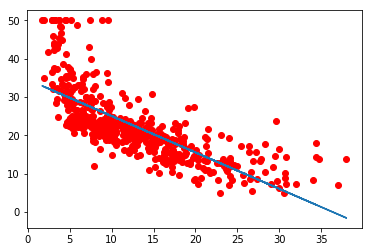

In [43]:
# plotting the true value and the least squares regression line
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, '-')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

38.48296722989415

## Multiple Linear Regression 

In [49]:
# fitting linear regression model with age and lstat as predictors
X = boston_df[['age', 'lstat']]
names = ['age', 'lstat']
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
# computing p-values and f-statistics to see if there is a relationship
f_statistics, p_values = f_regression(X, y)


print('Intercept: {}'.format(lin_reg.intercept_))
print('Coefficients:')
for i in range (0, len(lin_reg.coef_)):
    print('\t{}: {}'.format(names[i], lin_reg.coef_[i]))
print('Residuals: {}'.format(lin_reg.residues_))
print('F-statistic:')
for i in range (0, len(f_statistics)):
    print('\t{}: {}'.format(names[i], f_statistics[i]))
print('p-values:')
for i in range (0, len(p_values)):
    print('\t{}: {}'.format(names[i], p_values[i]))

Intercept: 33.2227605317929
Coefficients:
	age: 0.03454433857164599
	lstat: -1.0320685641826008
Residuals: 19168.128608760813
F-statistic:
	age: 83.47745921923611
	lstat: 601.6178711098958
p-values:
	age: 1.5699822091882311e-18
	lstat: 5.081103394387701e-88


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [51]:
# calculating r^2
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(X)

r2_score(y, y_pred)

0.5512689379421003

In [29]:
# fitting linear regression model with all the available features
X = boston_df.drop('medv', axis=1)
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
names = list(X)

# computing p-values and f-statistics to see if there is a relationship
f_statistics, p_values = f_regression(X, y)

print('Intercept: {}'.format(lin_reg.intercept_))
print('Coefficients:')
for i in range (0, len(lin_reg.coef_)):
    print('\t{}: {}'.format(names[i], lin_reg.coef_[i]))
print('Residuals: {}'.format(lin_reg.residues_))
print('F-statistic:')
for i in range (0, len(f_statistics)):
    print('\t{}: {}'.format(names[i], f_statistics[i]))
print('p-values:')
for i in range (0, len(p_values)):
    print('\t{}: {}'.format(names[i], p_values[i]))

Intercept: 36.45948838508971
Coefficients:
	crim: -0.10801135783679792
	zn: 0.046420458366880524
	indus: 0.020558626367069278
	chas: 2.6867338193448718
	nox: -17.76661122829994
	rm: 3.8098652068092287
	age: 0.0006922246403486945
	dis: -1.4755668456002575
	rad: 0.3060494789851716
	tax: -0.012334593916574843
	ptratio: -0.952747231707289
	black: 0.009311683273793692
	lstat: -0.5247583778554882
Residuals: 11078.784577954977
F-statistic:
	crim: 89.48611475768088
	zn: 75.25764229895438
	indus: 153.9548831361092
	chas: 15.971512420371939
	nox: 112.59148027969938
	rm: 471.8467398763848
	age: 83.47745921923611
	dis: 33.57957032590528
	rad: 85.91427766984026
	tax: 141.76135657742324
	ptratio: 175.10554287569477
	black: 63.054229112492784
	lstat: 601.6178711098958
p-values:
	crim: 1.1739870821946067e-19
	zn: 5.713584153080914e-17
	indus: 4.900259981753171e-31
	chas: 7.390623170520815e-05
	nox: 7.065041586254333e-24
	rm: 2.4872288710092848e-74
	age: 1.5699822091882311e-18
	dis: 1.206611727337284e-

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
# calculating r^2
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(X)

r2_score(y, y_pred)

0.74064266410940938

## Interaction Terms 

In [46]:
# including the interaction term of lstat and age (lstat * age)

X = boston_df[['lstat', 'age']].copy()
X['lstat_age'] = X['lstat'] * X['age']

lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
names = ['lstat', 'age', 'lstat_age']
# computing p-values and f-statistics to see if there is a relationship
f_statistics, p_values = f_regression(X, y)

print('Intercept: {}'.format(lin_reg.intercept_))
print('Coefficients:')
for i in range (0, len(lin_reg.coef_)):
    print('\t{}: {}'.format(names[i], lin_reg.coef_[i]))
print('Residuals: {}'.format(lin_reg.residues_))
print('F-statistic:')
for i in range (0, len(f_statistics)):
    print('\t{}: {}'.format(names[i], f_statistics[i]))
print('p-values:')
for i in range (0, len(p_values)):
    print('\t{}: {}'.format(names[i], p_values[i]))

Intercept: 36.088535934612885
Coefficients:
	lstat: -1.3921168406172677
	age: -0.0007208595085999958
	lstat_age: 0.004155951845429168
Residuals: 18977.71614458577
F-statistic:
	lstat: 601.6178711098958
	age: 83.47745921923611
	lstat_age: 412.44993481045094
p-values:
	lstat: 5.081103394387701e-88
	age: 1.5699822091882311e-18
	lstat_age: 1.922768858880601e-67


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
# calculating r^2
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(X)

r2_score(y, y_pred)

0.55572654509939345

## Non-linear Transformations of the Predictors

In [54]:
X = boston_df[['lstat']].copy()
X['lstat2'] = X['lstat'] ** 2

lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
names = ['lstat', 'lstat2']
# computing p-values and f-statistics to see if there is a relationship
f_statistics, p_values = f_regression(X, y)

print('Intercept: {}'.format(lin_reg.intercept_))
print('Coefficients:')
for i in range (0, len(lin_reg.coef_)):
    print('\t{}: {}'.format(names[i], lin_reg.coef_[i]))
print('Residuals: {}'.format(lin_reg.residues_))
print('F-statistic:')
for i in range (0, len(f_statistics)):
    print('\t{}: {}'.format(names[i], f_statistics[i]))
print('p-values:')
for i in range (0, len(p_values)):
    print('\t{}: {}'.format(names[i], p_values[i]))

Intercept: 42.86200732816933
Coefficients:
	lstat: -2.332821098282729
	lstat2: 0.043546889358222124
Residuals: 15347.243158381982
F-statistic:
	lstat: 601.6178711098958
	lstat2: 318.3287249289973
p-values:
	lstat: 5.081103394387701e-88
	lstat2: 1.5006683665893657e-55


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [56]:
# calculating r^2
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(X)

r2_score(y, y_pred)

0.64071689716366109

## Qualitative Predictors 

In [78]:
carseats_df = pd.read_csv('../data/Carseats.csv')
carseats_df.drop('Unnamed: 0', inplace=True, axis=1)
print(carseats_df.shape)
carseats_df.head()

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [72]:
y = carseats_df['Sales'].copy()
X_df = carseats_df.drop('Sales', axis=1).copy()

In [71]:
X_df_encoded = pd.get_dummies(X_df, prefix=['ShelveLoc', 'US', 'Urban'], 
                              columns=['ShelveLoc', 'Urban', 'US'])

X_df_encoded['income:adversiting'] = X_df_encoded['Income'] * X_df_encoded['Advertising']
X_df_encoded['price:age'] = X_df_encoded['Price'] * X_df_encoded['Age']

In [73]:
lin_reg.fit(X_df_encoded, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
names = list(X_df_encoded)
# computing p-values and f-statistics to see if there is a relationship
f_statistics, p_values = f_regression(X_df_encoded, y)

print('Intercept: {}'.format(lin_reg.intercept_))
print('Coefficients:')
for i in range (0, len(lin_reg.coef_)):
    print('\t{}: {}'.format(names[i], lin_reg.coef_[i]))
print('Residuals: {}'.format(lin_reg.residues_))
print('F-statistic:')
for i in range (0, len(f_statistics)):
    print('\t{}: {}'.format(names[i], f_statistics[i]))
print('p-values:')
for i in range (0, len(p_values)):
    print('\t{}: {}'.format(names[i], p_values[i]))

Intercept: 8.834179463116392
Coefficients:
	CompPrice: 0.09293711868520979
	Income: 0.010893961131691582
	Advertising: 0.0702462283789198
	Population: 0.00015924530692954658
	Price: -0.10080635828923806
	Age: -0.05794659022055669
	Education: -0.020852490674274488
	ShelveLoc_Bad: -2.267312734008574
	ShelveLoc_Good: 2.5813634732529147
	ShelveLoc_Medium: -0.31405073924433846
	US_No: -0.07007986182612612
	US_Yes: 0.07007986182612844
	Urban_No: 0.07877857159414525
	Urban_Yes: -0.0787785715941452
	income:adversiting: 0.0007510392099645909
	price:age: 0.0001067598496137838
Residuals: []
F-statistic:
	CompPrice: 1.6409591807157722
	Income: 9.406653017846333
	Advertising: 31.172472700036295
	Population: 1.016422622837252
	Price: 98.24768807466923
	Age: 22.60250482025794
	Education: 1.077248039295086
	ShelveLoc_Bad: 72.77204049305752
	ShelveLoc_Good: 133.02803902183277
	ShelveLoc_Medium: 2.1913795088492924
	US_No: 0.0946506555765976
	US_Yes: 0.09465065557659709
	Urban_No: 12.886224277474664
	Urb

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
